<a href="https://colab.research.google.com/github/andrecarlos26/Projeto-Interdisciplinar-SI-2/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

caminho = '/content/drive/My Drive/microdados_enem_2019/MICRODADOS_ENEM_2019_PE.csv'
dados_pe = pd.read_csv(caminho)

In [ ]:
dados_pe.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0  190001044305    2019                  2610004  ...    A     C    B
1  190001051159    2019                  2604007  ...    A     A    A
2  190001058610    2019                  2614105  ...    A     B    B
3  190001070444    2019                  2610509  ...    B     E    B
4  190001087987    2019                  2610707  ...    A     A    A

[5 rows x 136 columns]

Início de Análise Exploratória de features categóricas

In [ ]:
group_tp_sexo = dados_pe.groupby(['TP_SEXO']).size()
group_tp_sexo

TP_SEXO
F    159890
M    111837
dtype: int64

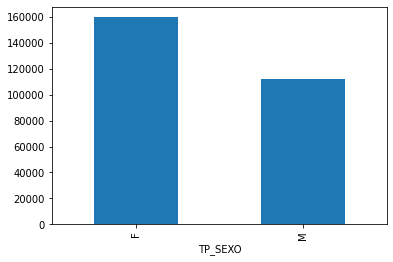

In [ ]:
group_tp_sexo.plot.bar()

In [ ]:
group_uf_nascimento = dados_pe.groupby(['SG_UF_NASCIMENTO']).size()
group_uf_nascimento

SG_UF_NASCIMENTO
AC        25
AL      1497
AM       134
AP        31
BA      4688
CE      1594
DF       323
ES        62
GO       144
MA       310
MG       291
MS        81
MT        77
PA       289
PB      2579
PE    240941
PI       625
PR       139
RJ      1124
RN       474
RO        66
RR        26
RS       139
SC        52
SE       242
SP      6168
TO        54
dtype: int64

Text(0.5, 1.0, 'UF de Nascimento')

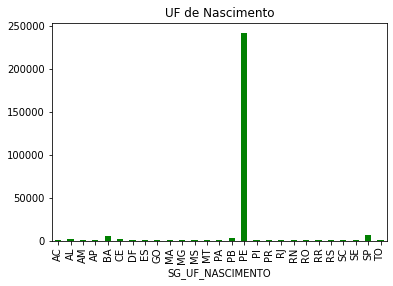

In [ ]:
group_uf_nascimento.plot.bar(color = 'green').set_title('UF de Nascimento')

In [ ]:
# Sigla do local de aplicação da prova
group_sg_aplicacao = dados_pe.groupby(['SG_UF_PROVA']).size()
group_sg_aplicacao

SG_UF_PROVA
AC         3
AL        85
AM         4
BA       255
CE       638
DF        16
ES         3
GO        19
MA        12
MG        13
MS        19
MT        10
PA        17
PB       490
PE    269810
PI        31
PR        40
RJ        20
RN        46
RO         2
RR         1
RS        10
SC        19
SE        28
SP       127
TO         9
dtype: int64

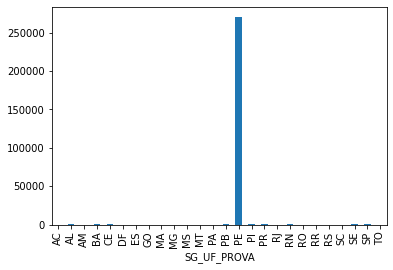

In [ ]:
# O Amapá é o unico estado que não teve residente de PE fazendo a prova no ano de 2019.
group_sg_aplicacao.plot.bar()

Faremos também algumas análises do questionário socioeconômico

In [ ]:
# Renda familiar
group_renda_familiar = dados_pe.groupby(['Q006']).size()
labels = ['Nenhuma renda', 'Até 998,00', '998,01 ~ 1.497,00', '1.497,01 ~ 1.996,00',
            '1.996,01 ~ 2.495,00', '2.495,01 ~ 2.994,00', '2.994,01 ~ 3.992,00.',
            '3.992,01 ~ 4.990,00', '4.990,01 ~ 5.988,00', '5.988,01 ~ 6.986,00',
            '6.986,01 ~ 7.984,00', '7.984,01 ~ 8.982,00', '8.982,01 ~ 9.980,00',
            '9.980,01 ~ 11.976,00', '11.976,01 ~ 14.970,00', '14.970,01 ~ 19.960,00',
            'Mais de 19.960,00']

group_renda_familiar.index = labels
group_renda_familiar

Nenhuma renda             19400
Até 998,00               102413
998,01 ~ 1.497,00         70293
1.497,01 ~ 1.996,00       20105
1.996,01 ~ 2.495,00       17253
2.495,01 ~ 2.994,00        7249
2.994,01 ~ 3.992,00.       9400
3.992,01 ~ 4.990,00        6202
4.990,01 ~ 5.988,00        4560
5.988,01 ~ 6.986,00        2614
6.986,01 ~ 7.984,00        1838
7.984,01 ~ 8.982,00        1406
8.982,01 ~ 9.980,00        1499
9.980,01 ~ 11.976,00       1984
11.976,01 ~ 14.970,00      1672
14.970,01 ~ 19.960,00      1558
Mais de 19.960,00          2281
dtype: int64

Text(0.5, 1.0, 'Renda Familiar')

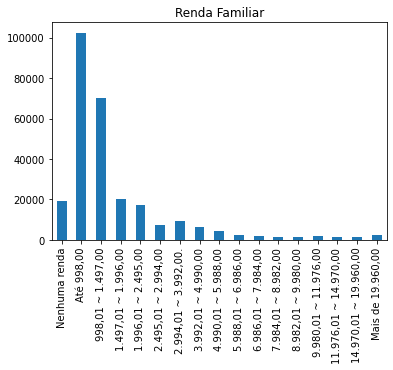

In [ ]:
group_renda_familiar.plot.bar().set_title('Renda Familiar')


In [ ]:
# Quantidade de banheiros da residência
group_qtd_banheiro = dados_pe.groupby(['Q008']).size()
labels_8 = ['Não', 'Sim, um.', 'Sim, dois', 'Sim, três', 'Sim, quatro ou mais']
group_qtd_banheiro.index = labels_8
group_qtd_banheiro

Não                      2671
Sim, um.               208422
Sim, dois               46044
Sim, três               10008
Sim, quatro ou mais      4582
dtype: int64

Text(0.5, 1.0, 'Quantidade de banheiros por residência')

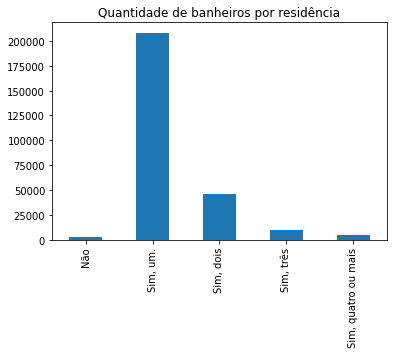

In [ ]:
group_qtd_banheiro.plot.bar().set_title('Quantidade de banheiros por residência')

In [ ]:
# Quantidade de quartos
group_qtd_quartos = dados_pe.groupby(['Q009']).size()
labels_9 = ['Não', 'Sim, um.', 'Sim, dois', 'Sim, três', 'Sim, quatro ou mais']
group_qtd_quartos.index = labels_9
group_qtd_quartos

Não                      1604
Sim, um.                25105
Sim, dois              155871
Sim, três               78001
Sim, quatro ou mais     11146
dtype: int64

Text(0.5, 1.0, 'Quantidade de quartos por residência')

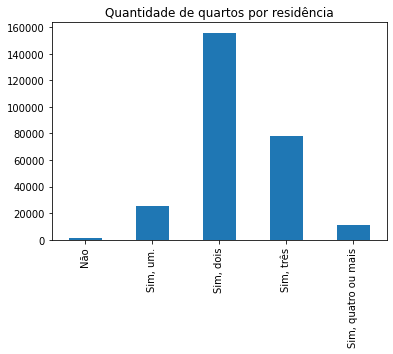

In [ ]:
group_qtd_quartos.plot.bar().set_title('Quantidade de quartos por residência')

In [ ]:
# Quantidade de celulares
group_qtd_celulares = dados_pe.groupby(['Q022']).size()
labels_22 = ['Não', 'Sim, um.', 'Sim, dois', 'Sim, três', 'Sim, quatro ou mais']
group_qtd_celulares.index = labels_22
group_qtd_celulares

Não                     6099
Sim, um.               61112
Sim, dois              91882
Sim, três              69015
Sim, quatro ou mais    43619
dtype: int64

Text(0.5, 1.0, 'Quantidade de celulares por residência')

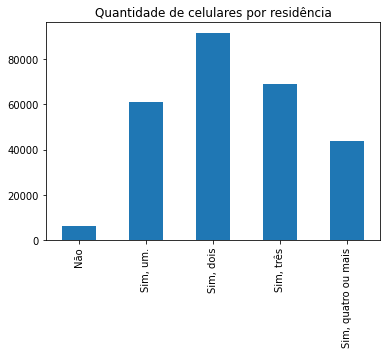

In [ ]:
group_qtd_celulares.plot.bar().set_title('Quantidade de celulares por residência')

In [ ]:
# Acesso à internet
group_internet = dados_pe.groupby(['Q025']).size()
labels_25 = ['Não', 'Sim']
group_internet.index = labels_25
group_internet

Não     51467
Sim    220260
dtype: int64

Text(0.5, 1.0, 'Acesso à internet por residência')

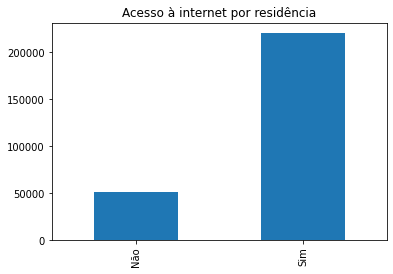

In [ ]:
group_internet.plot.bar().set_title('Acesso à internet por residência')

Análise Exploratória de features numéricas

In [ ]:
group_estadocivil = dados_pe.groupby(['TP_ESTADO_CIVIL']).size()
labels_estciv = ['Não informado','Solteiro(a)','Casado(a)/Mora com companheiro(a)','Divorciado(a)/Desquitado(a)/Separado(a)','Viúvo(a)']
group_estadocivil.index = labels_estciv
group_estadocivil

Não informado                                9255
Solteiro(a)                                235897
Casado(a)/Mora com companheiro(a)           21752
Divorciado(a)/Desquitado(a)/Separado(a)      4519
Viúvo(a)                                      304
dtype: int64

Text(0.5, 1.0, 'Estado civil')

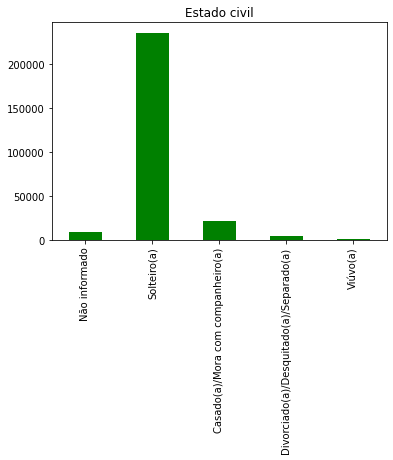

In [ ]:

group_estadocivil.plot.bar(color="green").set_title('Estado civil')


In [ ]:
group_raca = dados_pe.groupby(['TP_COR_RACA']).size()
labels_raca = ['Não declarado','Branca','Preta','Parda','Amarela','Indígena']
group_raca.index = labels_raca
group_raca

Não declarado      6560
Branca            77658
Preta             32396
Parda            143747
Amarela            7725
Indígena           3641
dtype: int64

Text(0, 0.5, '')

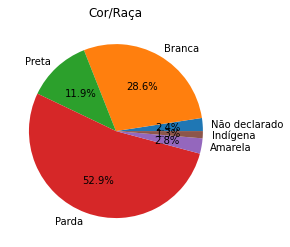

In [ ]:
group_raca.plot.pie(autopct='%1.1f%%').set_title('Cor/Raça')
plt.ylabel('')

In [ ]:
group_escola = dados_pe.groupby(['TP_ESCOLA']).size()
labels_escola = ['Não Respondeu','Pública','Privada']
group_escola.index = labels_escola
group_escola

Não Respondeu    199671
Pública           62180
Privada            9876
dtype: int64

Text(0.5, 1.0, 'Tipo de escola do Ensino Médio')

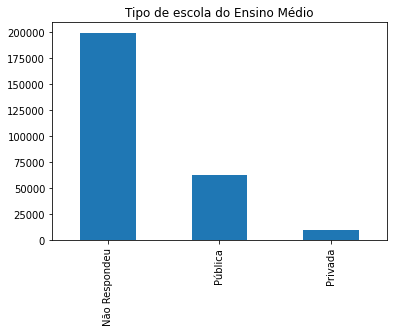

In [ ]:
group_escola.plot.bar().set_title('Tipo de escola do Ensino Médio')

A quantidade de pessoas que não responderam é superior as que responderam "Pública" ou "Privada", podendo acarretar em problemas na predição do desempenho do estudante na prova do ENEM.

Text(0.5, 1.0, 'Idade')

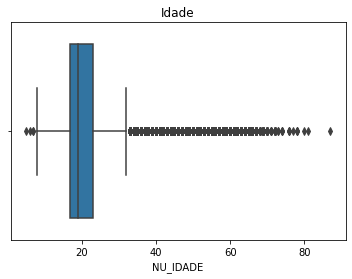

In [ ]:
sns.boxplot(dados_pe['NU_IDADE']).set_title('Idade')

Text(0.5, 1.0, 'Nota Ciência da Natureza')

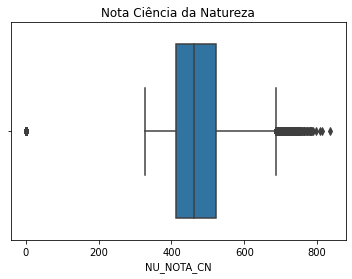

In [ ]:
sns.boxplot(dados_pe['NU_NOTA_CN']).set_title('Nota Ciência da Natureza')

Text(0.5, 1.0, 'Nota Ciências Humanas')

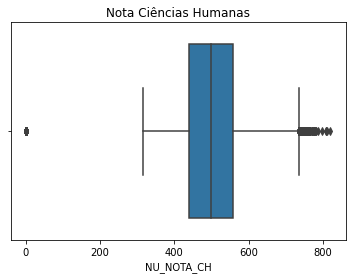

In [ ]:
sns.boxplot(dados_pe['NU_NOTA_CH']).set_title('Nota Ciências Humanas')

Text(0.5, 1.0, 'Linguagens e Códigos')

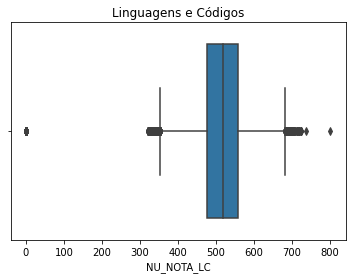

In [ ]:
sns.boxplot(dados_pe['NU_NOTA_LC']).set_title('Linguagens e Códigos')

Text(0.5, 1.0, 'Matemática')

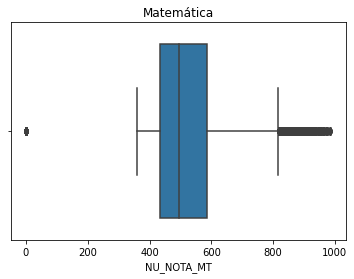

In [ ]:
sns.boxplot(dados_pe['NU_NOTA_MT']).set_title('Matemática')

Text(0.5, 1.0, 'Redação')

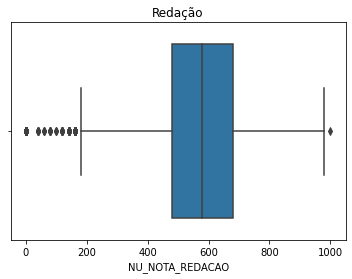

In [ ]:
sns.boxplot(dados_pe['NU_NOTA_REDACAO']).set_title('Redação')

In [ ]:
dados_pe['NU_NOTA_REDACAO'].isnull().sum()

58746

In [ ]:
dados_pe['NU_NOTA_LC'].isnull().sum()

58746

In [ ]:
group_presencad1 = dados_pe.groupby(['TP_PRESENCA_LC']).size()
labels_presenca = ['Faltou à prova','Presente na prova','Eliminado na prova']
group_presencad1.index = labels_presenca
group_presencad1

Faltou à prova         58540
Presente na prova     212981
Eliminado na prova       206
dtype: int64

Text(0.5, 1.0, 'Presença no 1º dia de prova')

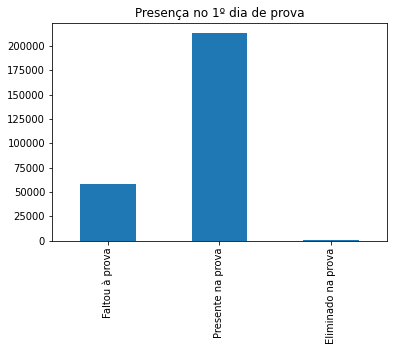

In [ ]:
group_presencad1.plot.bar().set_title('Presença no 1º dia de prova')

In [ ]:
group_presencad2 = dados_pe.groupby(['TP_PRESENCA_MT']).size()
labels_presenca = ['Faltou à prova','Presente na prova','Eliminado na prova']
group_presencad2.index = labels_presenca
group_presencad2

Faltou à prova         68379
Presente na prova     203242
Eliminado na prova       106
dtype: int64

Text(0.5, 1.0, 'Presença no 2º dia de prova')

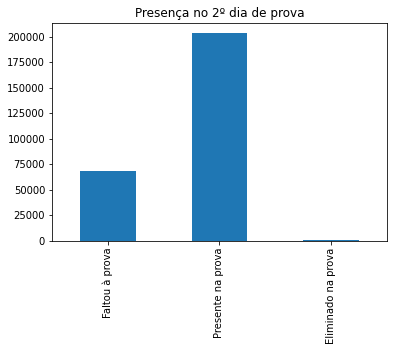

In [ ]:
group_presencad2.plot.bar().set_title('Presença no 2º dia de prova')

In [ ]:
def stats(feature):
  print('Estatisticas de %s\n' %feature)

  media = np.mean(dados_pe[feature])
  print( 'Média: %.2f' %media)

  mediana = sts.median(dados_pe[feature])
  print( 'Mediana: %.2f' %mediana)

  min = np.min(dados_pe[feature])
  print( 'Mínimo: %.2f' %min)
  
  max = np.max(dados_pe[feature])
  print( 'Máximo: %.2f\n' %max)

In [ ]:
stats('NU_IDADE')
stats('NU_NOTA_LC')
stats('NU_NOTA_MT')

Estatisticas de NU_IDADE

Média: 21.95
Mediana: 19.00
Mínimo: 5.00
Máximo: 87.00

Estatisticas de NU_NOTA_LC

Média: 514.10
Mediana: 598.60
Mínimo: 0.00
Máximo: 801.70

Estatisticas de NU_NOTA_MT

Média: 517.58
Mediana: 439.20
Mínimo: 0.00
Máximo: 985.00



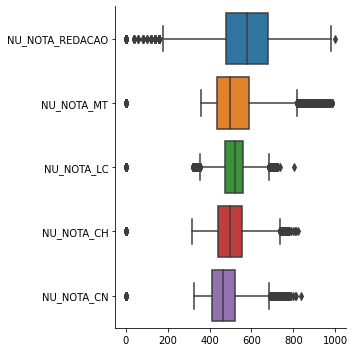

In [ ]:
dados_notas = dados_pe[['NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']]
sns.catplot(data=dados_notas, orient="h", kind="box")

In [ ]:
import plotly.express as px

In [ ]:
# Correlação entre Renda Familiar e nota da Redação
fig = px.scatter(dados_pe, x=dados_pe.Q006, y=dados_pe.NU_NOTA_MT)
fig.show()

In [ ]:
#Correlação entre Idade e nota da Redação
fig = px.scatter(dados_pe, x=dados_pe.NU_IDADE, y=dados_pe.NU_NOTA_REDACAO)
fig.show()

Nesse gráfico de correlação entre idade e nota da redação percebemos que existe uma relação fraca/média negativa. Significa que conforme a idade dos estudantes aumenta, a nota tem uma queda.
A partir dos 50 anos poucos conseguem obter uma nota superior a 800

In [ ]:
fig = px.scatter(dados_pe, x=dados_pe.NU_IDADE, y=dados_pe.NU_NOTA_MT)
fig.show()

In [ ]:
#Visualizar todas as linhas
pd.set_option('max_rows', 136)
dados_pe.isnull().sum()

NU_INSCRICAO                        0
NU_ANO                              0
CO_MUNICIPIO_RESIDENCIA             0
NO_MUNICIPIO_RESIDENCIA             0
CO_UF_RESIDENCIA                    0
SG_UF_RESIDENCIA                    0
NU_IDADE                            0
TP_SEXO                             0
TP_ESTADO_CIVIL                     0
TP_COR_RACA                         0
TP_NACIONALIDADE                    0
CO_MUNICIPIO_NASCIMENTO          9552
NO_MUNICIPIO_NASCIMENTO          9552
CO_UF_NASCIMENTO                 9552
SG_UF_NASCIMENTO                 9552
TP_ST_CONCLUSAO                     0
TP_ANO_CONCLUIU                     0
TP_ESCOLA                           0
TP_ENSINO                      102979
IN_TREINEIRO                        0
CO_ESCOLA                      210715
CO_MUNICIPIO_ESC               210715
NO_MUNICIPIO_ESC               210715
CO_UF_ESC                      210715
SG_UF_ESC                      210715
TP_DEPENDENCIA_ADM_ESC         210715
TP_LOCALIZAC